# FINAL PROJECT

Introduction: Introduce the project, your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

The Metric: Describe your metric, what features are you measuring. What datasets are you using?

The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.

Conclusion: Reflect on how the data driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.

## Introduction

For our project, we decided that the best neighborhood was the one that is best suitable for a street race. We first wanted to host an F1 race in Pittsburgh and the best neighborhood for this. However, we decided this would not be a fair metric because if Pittsburgh were to host a race, the city would ideally repave the entire road anyway and pick the most popular area. We then thought of an alternative which would be a street race that would be spontaneous and so the city could not plan around it. 


## The Metric

Our metric is the best neighborhood for a street race. We measured crashes, potholes, and traffic in each neighborhood. Potholes can ruin cars especially when your street car is lowered for maximum aerodynamics. Pedestrian drivers can be a nuisance and will cause unnecessary obstacles during a fair race. 


### Crashes

Our first dataset was “crashes in Allegheny County”. Crashes are bad; they ruin your nice street racers. We decided to find the neighborhood with the least amount of crashes. To do this we read in our data from the WPRCD

In [3]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry

df = pd.read_csv('crashes.csv')
df.head(10)

<ipython-input-3-6523d5b880de>:8: DtypeWarning: Columns (20,21,74,78,79,80,81,82,83,84,85,184,190) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crashes.csv')


,_id,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,1,2004000001,11,2,2454,02454,2004,1,5,257.0,...,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD,NaN,NaN
1,2,2004000010,11,2,2440,02440,2004,1,5,1027.0,...,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD,NaN,NaN
2,3,2004000016,11,2,2203,02203,2004,1,5,1839.0,...,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD,NaN,NaN
3,4,2004000022,11,2,2404,02404,2004,1,6,914.0,...,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV,NaN,NaN
4,5,2004000030,11,2,2419,02419,2004,1,5,2230.0,...,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR,NaN,NaN
5,6,2004000043,11,2,2111,02111,2004,1,6,1415.0,...,3.0,N,4.0,NaN,25.0,NaN,NaN,WARREN DR,NaN,NaN
6,7,2004000047,11,2,2435,02435,2004,1,6,1430.0,...,3.0,E,4.0,NaN,30.0,NaN,NaN,POPLAR ST,NaN,NaN
7,8,2004000058,11,2,2440,02440,2004,1,7,847.0,...,4.0,N,2.0,0051,40.0,NaN,NaN,NaN,NaN,NaN
8,9,2004000059,11,2,2454,02454,2004,1,7,1244.0,...,4.0,N,2.0,0051,40.0,NaN,NaN,CLAIRTON BL,NaN,NaN
9,10,2004000062,11,2,2438,02438,2004,1,1,1150.0,...,2.0,N,4.0,NaN,25.0,NaN,NaN,AMITY ST,NaN,NaN


Now, this data has Longitude and Latitude points in hours, minutes, and seconds but we need it in standard degrees. To convert it we have to apply the formula ```DD = d + (min/60) + (sec/3600)```. 

Now we need the hours, minutes, and seconds so we parse each row by the “ “ and the “:” and enter it into a new DataFrame. We have to do this for both Longitude and Latitude separately. 

In [4]:
crashes = df[['_id', 'LATITUDE', 'LONGITUDE']].dropna()
crashes.head()
var1 = crashes['LATITUDE'].str.split(' ', expand= True)
var2 = var1[1].str.split(':',expand=True)
var2['lat-degress'] = var1[0]
var2 = var2.rename(columns={ 0: 'lat-minutes', 1:'lat-seconds'})

var3 = crashes['LONGITUDE'].str.split(' ', expand= True)
var4 = var3[1].str.split(':',expand=True)
var4['long-degress'] = var3[0]
var4 = var4.rename(columns={ 0: 'long-minutes', 1:'long-seconds'})
crashes = pd.concat([var2,var4], axis=1)
crashes

,lat-minutes,lat-seconds,lat-degress,long-minutes,long-seconds,long-degress
1,19,05.530,40,54,27.197,79
2,29,18.923,40,20,13.631,80
6,25,07.576,40,02,57.719,80
11,27,40.438,40,00,31.456,80
14,19,29.758,40,04,53.882,80
...,...,...,...,...,...,...
204893,30,41.281,40,00,13.786,80
204894,35,53.878,40,46,09.243,79
204895,26,15.716,40,58,33.302,79
204896,26,30.681,40,03,25.664,80


Python believes the values are strings of characters but we need them as numerical values so we need to convert all of them. We then merge the longitudes and latitudes into one data frame. Then we can apply the math to all the rows of this data frame and get our Longitude and Latitude 

In [5]:
empty = pd.DataFrame()
for col in crashes:
    empty[col] = pd.to_numeric(crashes[col], errors='coerce')
crashes= empty

crashes['LATITUDE'] = crashes['lat-degress']+(crashes['lat-minutes']/60)+(crashes['lat-seconds']/3600)
crashes['LONGITUDE'] = crashes['long-degress']+(crashes['long-minutes']/60)+(crashes['long-seconds']/3600)
crashes2 = crashes[['LONGITUDE', 'LATITUDE']]
crashes2

,LONGITUDE,LATITUDE
1,79.907555,40.318203
2,80.337120,40.488590
6,80.049366,40.418771
11,80.008738,40.461233
14,80.081634,40.324933
...,...,...
204893,80.003829,40.511467
204894,79.769234,40.598299
204895,79.975917,40.437699
204896,80.057129,40.441856


Now our longitude and latitude are just numbers, GeoPandas has no context of what these numbers are. We’re going to want to eventually map these crashes inside of the neighborhoods. We want to tell GeoPandas that these two values are Points.

In [6]:
crashes3 = pd.DataFrame()
crashes3['LONGITUDE'] = crashes2['LONGITUDE'].mul(-1)
crashes3['LATITUDE'] = crashes2['LATITUDE']
crashes3 = geopandas.GeoDataFrame(crashes3, geometry=crashes3.loc[:,["LONGITUDE","LATITUDE",]].apply(shapely.geometry.Point, axis=1))
crashes3

,LONGITUDE,LATITUDE,geometry
1,-79.907555,40.318203,POINT (-79.90755 40.31820)
2,-80.337120,40.488590,POINT (-80.33712 40.48859)
6,-80.049366,40.418771,POINT (-80.04937 40.41877)
11,-80.008738,40.461233,POINT (-80.00874 40.46123)
14,-80.081634,40.324933,POINT (-80.08163 40.32493)
...,...,...,...
204893,-80.003829,40.511467,POINT (-80.00383 40.51147)
204894,-79.769234,40.598299,POINT (-79.76923 40.59830)
204895,-79.975917,40.437699,POINT (-79.97592 40.43770)
204896,-80.057129,40.441856,POINT (-80.05713 40.44186)


Now we want to get a map of our neighborhoods. We can get this through the shapefile from Lab 10 - Data Visualization.

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,1.027890e+07,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,5.579501e+06,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,6.050988e+06,15,Stephanie Joy Everett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,1.271304e+07,15,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


Now we need to check if our points are inside the polygons of the shapefile, the polygons are neighborhoods. 

In [8]:
crashes_count = pd.DataFrame(index= neighborhoods['hood'])
var = crashes3['geometry'].squeeze()
var = geopandas.GeoDataFrame(var, crs=4326)
var

,geometry
1,POINT (-79.90755 40.31820)
2,POINT (-80.33712 40.48859)
6,POINT (-80.04937 40.41877)
11,POINT (-80.00874 40.46123)
14,POINT (-80.08163 40.32493)
...,...
204893,POINT (-80.00383 40.51147)
204894,POINT (-79.76923 40.59830)
204895,POINT (-79.97592 40.43770)
204896,POINT (-80.05713 40.44186)


This for loop returns true or false values for each point. A one, if it is inside and 0 if it is not. We can then sum this column of 1s and 0s and get the count of crashes inside the neighborhood.

In [9]:
count = 0
for i,row in neighborhoods.iterrows():
    shape = row['geometry']
    neighborhood_name = row['hood']
    crashes_count.loc[neighborhood_name, 'crash_count'] = var.within(shape).sum()
crashes_count

,crash_count
hood,
Central Oakland,652.0
North Oakland,1030.0
West Oakland,488.0
Crawford-Roberts,329.0
Strip District,1713.0
...,...
Ridgemont,504.0
West End,1054.0
California-Kirkbride,140.0


Finally, we can merge the counts and the map itself and plot it.

In [ ]:
crash_map = neighborhoods.merge(crashes_count, how='left', left_on='hood', right_on='hood')
crash_map[['hood','crash_count','geometry']].head()

In [ ]:
crash_map.plot(column='crash_count',
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Crashes"}, # label the legend
               figsize=(15, 10),         # set the size
              )

In [10]:
crashes = crashes_count.sort_values(by=['crash_count'])
crashes

,crash_count
hood,
Arlington Heights,9.0
East Carnegie,32.0
Chartiers City,40.0
Glen Hazel,49.0
Mt. Oliver,49.0
...,...
Carrick,1793.0
South Oakland,1892.0
South Side Flats,2156.0


### Potholes

The second dataset for our project is potholes. You don't want potholes when street racing because they can mess up the cars when they are going that fast. The neighborhood with the lowest amount of potholes probably is the best for s street race.

In [2]:
import pandas as pd
import geopandas

data = pd.read_csv("potholesdata.csv",index_col = "CREATED_ON")
data.head(3)

,_id,REQUEST_ID,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
CREATED_ON,,,,,,,,,,,,,,,,,
2017-06-14T10:03:00,70915,161823.0,Rodent control,Call Center,1,Animal Care & Control,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.943235,40.467422,APPROXIMATE
2017-08-11T08:03:00,48238,178453.0,Illegal Parking,Call Center,1,Police - Zones 1-6,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-21,-79.916473,40.430555,APPROXIMATE
2017-08-11T08:37:00,38897,178457.0,Potholes,Call Center,1,DPW - Street Maintenance,Beltzhoover,4.0,18.0,4.200356e+10,5.0,18.0,3.0,4-21,-79.998201,40.413781,EXACT


Here I just impoted pandas and read in the 311 dataset and ordered it by the date the request was created on.

In [4]:
only_pots = data['REQUEST_TYPE'] == 'Potholes';
pots = data[only_pots]
pots.head()

,_id,REQUEST_ID,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
CREATED_ON,,,,,,,,,,,,,,,,,
2017-08-11T08:37:00,38897,178457.0,Potholes,Call Center,1,DPW - Street Maintenance,Beltzhoover,4.0,18.0,4.200356e+10,5.0,18.0,3.0,4-21,-79.998201,40.413781,EXACT
2017-08-11T09:05:00,57654,178468.0,Potholes,Call Center,1,DPW - Street Maintenance,Lincoln Place,5.0,31.0,4.200331e+10,3.0,31.0,4.0,4-20,-79.923985,40.379053,EXACT
2017-08-11T09:52:00,56233,178497.0,Potholes,Call Center,1,DPW - Street Maintenance,Morningside,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,-79.928738,40.482461,EXACT
2017-08-11T09:57:00,57324,178500.0,Potholes,Call Center,1,DPW - Street Maintenance,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.917332,40.475671,EXACT
2017-08-11T10:04:00,58191,178505.0,Potholes,Call Center,1,DPW - Street Maintenance,Larimer,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-12,-79.910853,40.468965,EXACT


Then I created a query mask and filtered the data to only potholes requests.

In [5]:
grouped_pots = pots.groupby("NEIGHBORHOOD").count()
grouped_pots1 = grouped_pots['REQUEST_ID'].sort_values(ascending=True)
grouped_pots1.head()

NEIGHBORHOOD
Mount Oliver Borough    15
Arlington Heights       29
Glen Hazel              37
Chartiers City          56
St. Clair               73
Name: REQUEST_ID, dtype: int64

Then I grouped the dataframe by the neighborhoods and assorted it in ascending order.

In [6]:
grouped_pots1 = grouped_pots1.to_frame()
grouped_pots1.rename(columns = {"REQUEST_ID":"NUM_POTHOLES"}, inplace = True)
grouped_pots1.head()

,NUM_POTHOLES
NEIGHBORHOOD,
Mount Oliver Borough,15
Arlington Heights,29
Glen Hazel,37
Chartiers City,56
St. Clair,73


I then had to turn it back into a dataframe, then named the cloumn for the number of potholes.

In [7]:
grouped_pots1.describe()

,NUM_POTHOLES
count,91.000000
mean,678.945055
std,650.459912
min,15.000000
25%,233.500000
50%,479.000000
75%,885.000000
max,3702.000000


This is the statistics for the dataframe.

In [8]:
grouped_pots1.sort_values(by=['NUM_POTHOLES'])

,NUM_POTHOLES
NEIGHBORHOOD,
Mount Oliver Borough,15
Arlington Heights,29
Glen Hazel,37
Chartiers City,56
St. Clair,73
...,...
Central Lawrenceville,1752
Carrick,2540
Bloomfield,2596


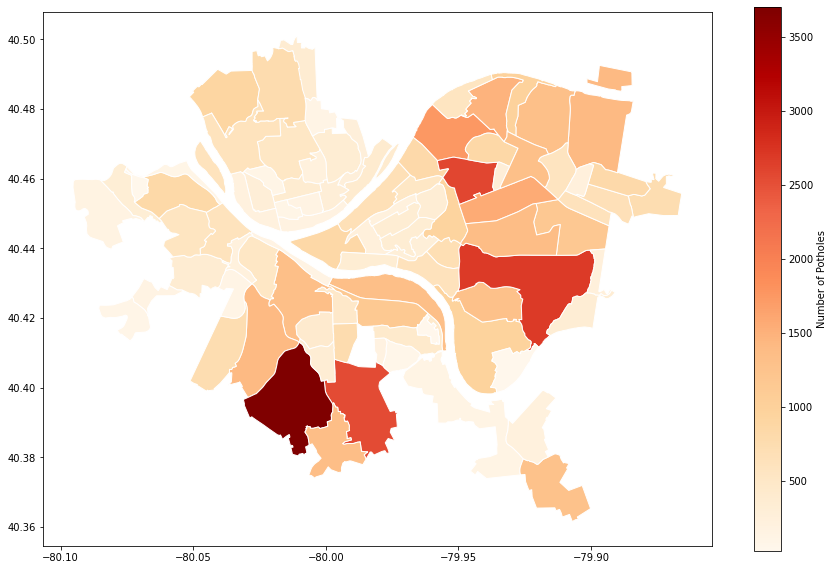

In [9]:
hoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
maps = hoods.merge(grouped_pots1, how='left', left_on='hood', right_on='NEIGHBORHOOD')
maps.plot(column='NUM_POTHOLES',
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Potholes"}, # label the legend
               figsize=(15, 10),         # set the size
               #missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              )

Here I created a heat map of potholes in Pittsburgh. You can see that placed like Brookline and Squirrel Hill have the most but its not easy to see who has the least.

In [10]:
shape = pd.read_csv('https://pghgishub-pittsburghpa.opendata.arcgis.com/datasets/3ca13246362540fa8b4b567f84a1255b_0.csv?outSR=%7B%22latestWkid%22%3A6565%2C%22wkid%22%3A103142%7D')
oshape = shape.sort_values(by = ['Neighborhood_2010_HOOD'],ascending = True)
oshape.shape

(90, 192)

Here I read in a csv file that has the area of all the neighborhoods in the city.

In [11]:
orderpots = grouped_pots1.sort_values('NEIGHBORHOOD')
orderpots = orderpots.drop(labels='Mount Oliver Borough')
orderpots.shape

(90, 1)

Here I got rid of Mount Oliver Borough from the original dataset because the new one does not contain it.

In [12]:
donepots = pd.merge(orderpots,oshape[['Neighborhood_2010_HOOD','Neighborhood_2010_AREA']],right_on='Neighborhood_2010_HOOD',left_on="NEIGHBORHOOD" ,how = 'left')
donepots.head()

,NUM_POTHOLES,Neighborhood_2010_HOOD,Neighborhood_2010_AREA
0,157,Allegheny Center,5840713.0
1,107,Allegheny West,3938870.2
2,479,Allentown,8221419.5
3,431,Arlington,13108599.0
4,29,Arlington Heights,3667921.5


Then I added the area column to a new dataframe with the number of potholes and name of the neighborhoods.

In [13]:
donepots['density'] = donepots['NUM_POTHOLES']/(donepots['Neighborhood_2010_AREA'])
donepots.head()

,NUM_POTHOLES,Neighborhood_2010_HOOD,Neighborhood_2010_AREA,density
0,157,Allegheny Center,5840713.0,0.000027
1,107,Allegheny West,3938870.2,0.000027
2,479,Allentown,8221419.5,0.000058
3,431,Arlington,13108599.0,0.000033
4,29,Arlington Heights,3667921.5,0.000008


Then I divided the potholes column by the area column to get a density of potholes.

In [ ]:
donepots = donepots.sort_values(by = ['density'],ascending = True)
donepots.set_index('Neighborhood_2010_HOOD', inplace =  True)
print(donepots)

Here is the new dataframe sorted.

In [ ]:
donepots.plot(kind='barh', y = 'density',figsize=(20,30),ylabel='Density',xlabel='Neighborhoods')


Here you can see that on the horizontal bar chart that Hays and Glen Hazel have the two lowest densities of pothole requests.

### Traffic

You don't want to race in an area with a lot of traffic because other cars and bikes get in the way of street racers, which would slow down the race, not to mention make it more dangerous for everyone involved.


First I imported pandas and read in the traffic dataset. You can see that there are a ton of columns, but we just need the two traffic counts columns, and the column for the neighborhood.

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

traffic_counts = pd.read_csv("traffic.csv")

traffic_counts.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


Here I used groupby.mean() to isolate the necessary columns, and take the average count for every neigborhood, because some neighborhoods have more traffic counters than others. 

In [13]:
traffic = traffic_counts.groupby("neighborhood").mean()
traffic =traffic.loc[:, ["average_daily_car_traffic", "average_daily_bike_traffic"]]
traffic

,average_daily_car_traffic,average_daily_bike_traffic
neighborhood,,
Allegheny Center,2386.000000,NaN
Allegheny West,477.000000,NaN
Arlington,2285.500000,NaN
Banksville,NaN,NaN
Beechview,1418.333333,NaN
...,...,...
Upper Hill,953.333333,NaN
Upper Lawrenceville,NaN,NaN
West Oakland,2585.000000,NaN


In [ ]:
However, because there were a lot of NaN values, I decided to convert those to zeros.

In [15]:
traffic = traffic.fillna(0)
traffic

,average_daily_car_traffic,average_daily_bike_traffic
neighborhood,,
Allegheny Center,2386.000000,0.0
Allegheny West,477.000000,0.0
Arlington,2285.500000,0.0
Banksville,0.000000,0.0
Beechview,1418.333333,0.0
...,...,...
Upper Hill,953.333333,0.0
Upper Lawrenceville,0.000000,0.0
West Oakland,2585.000000,0.0


Finally I added those two columns together to get the actual average traffic count for each neighborhood.

In [16]:
traffic["average_daily_traffic"] = traffic["average_daily_car_traffic"]+ traffic["average_daily_bike_traffic"]
traffic

,average_daily_car_traffic,average_daily_bike_traffic,average_daily_traffic
neighborhood,,,
Allegheny Center,2386.000000,0.0,2386.000000
Allegheny West,477.000000,0.0,477.000000
Arlington,2285.500000,0.0,2285.500000
Banksville,0.000000,0.0,0.000000
Beechview,1418.333333,0.0,1418.333333
...,...,...,...
Upper Hill,953.333333,0.0,953.333333
Upper Lawrenceville,0.000000,0.0,0.000000
West Oakland,2585.000000,0.0,2585.000000


Then I sorted the data and plotted it in a bar chart.

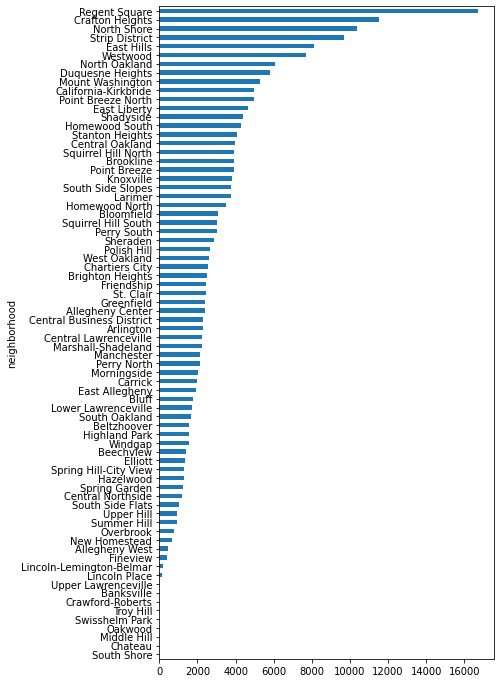

In [17]:
traffic = traffic.sort_values(by = "average_daily_traffic")
traffic["average_daily_traffic"].plot(figsize=(6,12), kind = "barh" )

## Conclusion

Because each of these submetrics is something that we wanted the least of, we normalized the data by divided each submetric by the score of the worst neigborhood for that submetric. Then, we added the three together, and the one with the lowest score would be our best neighborhood.

In [45]:
total = crashes
total["crashes"] = total["crash_count"]/ 3728
total


,crash_count,crashes
hood,,
Arlington Heights,9.0,0.002414
East Carnegie,32.0,0.008584
Chartiers City,40.0,0.010730
Glen Hazel,49.0,0.013144
Mt. Oliver,49.0,0.013144
...,...,...
Carrick,1793.0,0.480955
South Oakland,1892.0,0.507511
South Side Flats,2156.0,0.578326


In [50]:
traffic["traffics_"] = traffic["average_daily_traffic"]/16729
traffic


,average_daily_car_traffic,average_daily_bike_traffic,average_daily_traffic,traffics,traffics_
neighborhood,,,,,
South Shore,0.000000,0.0,0.000000,0.000000,0.000000
Chateau,0.000000,0.0,0.000000,0.000000,0.000000
Middle Hill,0.000000,0.0,0.000000,0.000000,0.000000
Oakwood,0.000000,0.0,0.000000,0.000000,0.000000
Swisshelm Park,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
East Hills,8126.500000,0.0,8126.500000,0.485773,0.485773
Strip District,9691.666667,0.0,9691.666667,0.579333,0.579333
North Shore,10350.000000,0.0,10350.000000,0.618686,0.618686


In [51]:

total = total.merge(traffic, how = 'left', left_on = "hood", right_on = "neighborhood")
total = total.fillna(0)
total

,crash_count,crashes,average_daily_car_traffic,average_daily_bike_traffic,average_daily_traffic,traffics,traffics_
0,9.0,0.002414,0.000000,0.0,0.000000,0.000000,0.000000
1,32.0,0.008584,0.000000,0.0,0.000000,0.000000,0.000000
2,40.0,0.010730,2571.000000,0.0,2571.000000,0.153685,0.153685
3,49.0,0.013144,0.000000,0.0,0.000000,0.000000,0.000000
4,49.0,0.013144,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
85,1793.0,0.480955,1969.571429,0.0,1969.571429,0.117734,0.117734
86,1892.0,0.507511,0.000000,1670.5,1670.500000,0.099857,0.099857
87,2156.0,0.578326,115.000000,923.0,1038.000000,0.062048,0.062048
88,2963.0,0.794796,3050.076923,0.0,3050.076923,0.182323,0.182323


In [53]:
total["score"] = total["crashes"] + total["traffics_"]
total

,crash_count,crashes,average_daily_car_traffic,average_daily_bike_traffic,average_daily_traffic,traffics,traffics_,score
0,9.0,0.002414,0.000000,0.0,0.000000,0.000000,0.000000,0.002414
1,32.0,0.008584,0.000000,0.0,0.000000,0.000000,0.000000,0.008584
2,40.0,0.010730,2571.000000,0.0,2571.000000,0.153685,0.153685,0.164415
3,49.0,0.013144,0.000000,0.0,0.000000,0.000000,0.000000,0.013144
4,49.0,0.013144,0.000000,0.0,0.000000,0.000000,0.000000,0.013144
...,...,...,...,...,...,...,...,...
85,1793.0,0.480955,1969.571429,0.0,1969.571429,0.117734,0.117734,0.598689
86,1892.0,0.507511,0.000000,1670.5,1670.500000,0.099857,0.099857,0.607367
87,2156.0,0.578326,115.000000,923.0,1038.000000,0.062048,0.062048,0.640374
88,2963.0,0.794796,3050.076923,0.0,3050.076923,0.182323,0.182323,0.977119


## Tyler's Conclusion
When we first thought of street racing in a Pittsburgh neighborhood, the first place I though of was downtown. I am from around the area, so I thought that having a race in the middle of Pittsburgh would be cool with all the buildings and streets. I was picturing some fast and furious race, but according to my data Hays seems like the best place to have a street race based on the pothole data. I have not heard of this place before, but I looked it up and it is near the river, so that might make a cool scene when having a race.

## Declan's Conclusion
I am not from Pittsburgh so I didn't know of the neighborhoods but, I assumed maybe downtown would be best for a street race, more tokyo drift style. I also thought the Mount Washington would be good to race on too. Based on my data I can conclude that Arlington heights and East Carnegie would be the best as they have the least amount of crashes. Factoring in Tyler and Sarah's data, I think East Carnegie would be the best becuase it has few crashes and few potholes.

## Sarah's Conclusion
If I was planning a streetrace, I would porbably just go down Fifth Avenue in Oakland because it is a very wide road. However, according to my data set Oakland would be one of the not-so-good places to race because of the large amount of traffic. From my dataset I concluded that a quieter neighborhood like South Shore or Chateau would be better.